In [120]:
import warnings
warnings.filterwarnings('ignore')

import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

data_dir = '/home/mnedal/repos/dias_work'

# solar radius in arcsec in instruments FoV
rsun_aia      = 949.556184
rsun_suvi     = 949.1129337297962
rsun_lasco_c2 = 948.9823639616588
rsun_lasco_c3 = 948.9798944687567

# 1.	Blues
# 2.	Greens
# 3.	Greys
# 4.	Oranges
# 5.	Purples
# 6.	Reds

In [121]:
def generate_centered_list(center, difference, num_elements):
    """
    Generate a list of numbers centered around a given number with a specified difference
    between consecutive numbers.

    Parameters:
    center (int): The central number around which the list is generated.
    difference (int): The difference between consecutive numbers in the list.
    num_elements (int): The number of elements before and after the central number.

    Returns:
    list: A list of numbers centered around the specified central number.
    """
    return [center + difference * i for i in range(-num_elements, num_elements + 1)]

In [122]:
centered_list = generate_centered_list(160, 2, 3)
print(centered_list)

[154, 156, 158, 160, 162, 164, 166]


## Plot points from J-maps and type-IIs with error bars in one height-time profile

In [123]:
radio_filenames = glob.glob(f'{data_dir}/ccuddy/*_stats.csv')
print(len(radio_filenames), *radio_filenames, sep='\n')

14
/home/mnedal/repos/dias_work/ccuddy/burst1HH_stats.csv
/home/mnedal/repos/dias_work/ccuddy/burst4F_stats.csv
/home/mnedal/repos/dias_work/ccuddy/burst3HH_stats.csv
/home/mnedal/repos/dias_work/ccuddy/burst3MF_stats.csv
/home/mnedal/repos/dias_work/ccuddy/burst3HF_stats.csv
/home/mnedal/repos/dias_work/ccuddy/burst3MH_stats.csv
/home/mnedal/repos/dias_work/ccuddy/burst4H_stats.csv
/home/mnedal/repos/dias_work/ccuddy/burst1HF_stats.csv
/home/mnedal/repos/dias_work/ccuddy/burst2H_stats.csv
/home/mnedal/repos/dias_work/ccuddy/burst1LH_stats.csv
/home/mnedal/repos/dias_work/ccuddy/burst3LH_stats.csv
/home/mnedal/repos/dias_work/ccuddy/burst3LF_stats.csv
/home/mnedal/repos/dias_work/ccuddy/burst2F_stats.csv
/home/mnedal/repos/dias_work/ccuddy/burst1LF_stats.csv


In [124]:
suvi_click_filenames = sorted(glob.glob(f'{data_dir}/jplots/suvi/clicking/*.csv'))
print(len(suvi_click_filenames), *suvi_click_filenames, sep='\n')

# # Filter file paths that end with any of the specified numbers
# filtered_suvi_paths = [
#     path for path in suvi_click_filenames
#     if int(os.path.splitext(path)[0].split('_')[-1]) in centered_list
# ]

13
/home/mnedal/repos/dias_work/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_148.csv
/home/mnedal/repos/dias_work/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_150.csv
/home/mnedal/repos/dias_work/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_152.csv
/home/mnedal/repos/dias_work/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_154.csv
/home/mnedal/repos/dias_work/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_156.csv
/home/mnedal/repos/dias_work/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_158.csv
/home/mnedal/repos/dias_work/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_160.csv
/home/mnedal/repos/dias_work/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_162.csv
/home/mnedal/repos/dias_work/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_164.csv
/home/mnedal/repos/dias_work/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_166.csv
/home/mnedal/repos/dias_work/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_168.csv
/home/mnedal/repos/dias_work/jplots/suvi

In [125]:
c2_click_filenames = sorted(glob.glob(f'{data_dir}/jplots/lasco_C2/clicking/*.csv'))
print(len(c2_click_filenames), *c2_click_filenames, sep='\n')

16
/home/mnedal/repos/dias_work/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_130.csv
/home/mnedal/repos/dias_work/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_148.csv
/home/mnedal/repos/dias_work/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_150.csv
/home/mnedal/repos/dias_work/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_152.csv
/home/mnedal/repos/dias_work/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_154.csv
/home/mnedal/repos/dias_work/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_156.csv
/home/mnedal/repos/dias_work/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_158.csv
/home/mnedal/repos/dias_work/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_160.csv
/home/mnedal/repos/dias_work/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_162.csv
/home/mnedal/repos/dias_work/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_164.csv
/home/mnedal/repos/dias_work/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_166.csv
/home/m

In [126]:
c3_click_filenames = sorted(glob.glob(f'{data_dir}/jplots/lasco_C3/clicking/*.csv'))
print(len(c3_click_filenames), *c3_click_filenames, sep='\n')

7
/home/mnedal/repos/dias_work/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_154.csv
/home/mnedal/repos/dias_work/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_156.csv
/home/mnedal/repos/dias_work/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_158.csv
/home/mnedal/repos/dias_work/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_160.csv
/home/mnedal/repos/dias_work/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_162.csv
/home/mnedal/repos/dias_work/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_164.csv
/home/mnedal/repos/dias_work/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_166.csv


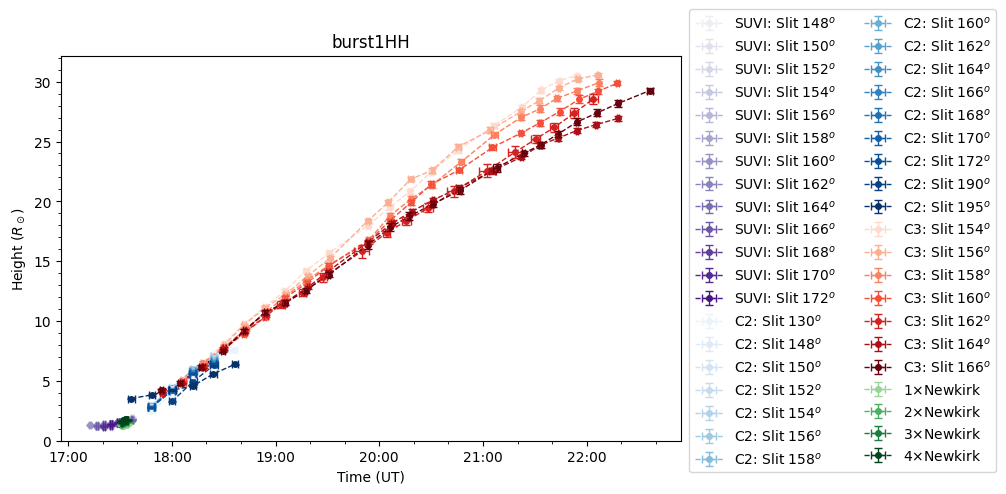

In [19]:
cmap_radio = plt.get_cmap('Greens')
colors_radio = [cmap_radio(i / 5) for i in range(1, 6)]

cmap_suvi = plt.get_cmap('Purples')
color_offset = 2
colors_suvi = [cmap_suvi((i+color_offset) / (len(suvi_filenames)+color_offset)) for i in range(len(suvi_filenames))]

cmap_c2 = plt.get_cmap('Blues')
colors_c2 = [cmap_c2(i / len(c2_click_filenames)) for i in range(1, len(c2_click_filenames)+1)]

cmap_c3 = plt.get_cmap('Reds')
colors_c3 = [cmap_c3(i / len(c3_click_filenames)) for i in range(1, len(c3_click_filenames)+1)]


# RADIO CURVES ...
for file in radio_filenames[:1]:
    df_radio = pd.read_csv(file)
    x = df_radio['t_means']
    
    fig = plt.figure(figsize=[8,5])
    ax = fig.add_subplot(111)

    # SUVI CURVES ...
    for i, suvifile in enumerate(suvi_filenames):
        df_suvi = pd.read_csv(suvifile)
        ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                    xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                    markersize=4, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_suvi[i],
                    ecolor=colors_suvi[i], label=f"SUVI: Slit {suvifile.split('slit')[-1][1:4]}$^o$")
    
    # LASCO C2 CURVES ...
    for i, c2file in enumerate(c2_click_filenames):
        df_c2 = pd.read_csv(c2file)
        ax.errorbar(df_c2['x_mean'], df_c2['y_mean']/rsun_lasco_c2,
                    xerr=df_c2['x_err'], yerr=df_c2['y_err']/rsun_lasco_c2,
                    markersize=4, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_c2[i],
                    ecolor=colors_c2[i], label=f"C2: Slit {c2file.split('slit')[-1][1:4]}$^o$")

    # LASCO C3 CURVES ...
    for i, c3file in enumerate(c3_click_filenames):
        df_c3 = pd.read_csv(c3file)
        ax.errorbar(df_c3['x_mean'], df_c3['y_mean']/rsun_lasco_c3,
                    xerr=df_c3['x_err'], yerr=df_c3['y_err']/rsun_lasco_c3,
                    markersize=4, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_c3[i],
                    ecolor=colors_c3[i], label=f"C3: Slit {c3file.split('slit')[-1][1:4]}$^o$")

    # RADIO CURVES ...
    for i in range(1, 5):
        y = df_radio[f'h{i}_means']
        ax.errorbar(x, y, xerr=df_radio['t_standard_errors'], yerr=df_radio[f'h{i}_standard_errors'],
                    markersize=4, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_radio[i],
                    ecolor=colors_radio[i], label=f'{i}$\\times$Newkirk')

    ax.set_title(f"{file.split('/')[-1].split('_')[0]}")
    ax.legend(loc='lower right', bbox_to_anchor=(1.52,-0.1), ncol=2)
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=3))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.set_ylim(bottom=0)
    ax.set_xlabel('Time (UT)')
    ax.set_ylabel(r'Height ($R_\odot$)')
    # fig.savefig(f"/home/mnedal/repos/dias_work/jplots/all_clicking/suvi_c2_c3_radio/suvi_c2_c3_{file.split('/')[-1].split('_')[0]}.pdf", format='pdf', bbox_inches='tight')
    plt.show()

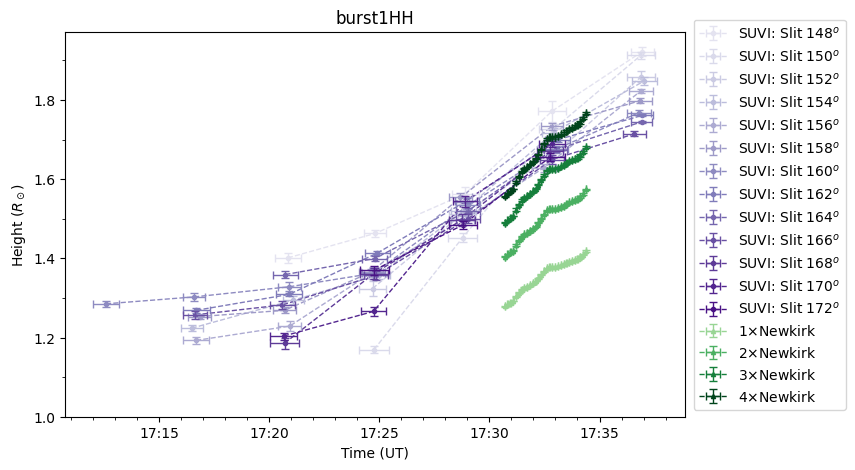

In [95]:
cmap_radio = plt.get_cmap('Greens')
colors_radio = [cmap_radio(i / 5) for i in range(1, 6)]

cmap_suvi = plt.get_cmap('Purples') # Purples, Greys
color_offset = 3
colors_suvi = [cmap_suvi((i+color_offset) / (len(suvi_filenames)+color_offset)) for i in range(len(suvi_filenames))]


# RADIO CURVES ...
for file in radio_filenames[:1]:
    df_radio = pd.read_csv(file)
    x = df_radio['t_means']
    
    fig = plt.figure(figsize=[8,5])
    ax = fig.add_subplot(111)

    # SUVI CURVES ...
    for i, suvifile in enumerate(suvi_filenames):
        df_suvi = pd.read_csv(suvifile)
        ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                    xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                    markersize=3, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_suvi[i],
                    ecolor=colors_suvi[i], label=f"SUVI: Slit {suvifile.split('slit')[-1][1:4]}$^o$")

    # RADIO CURVES ...
    for i in range(1, 5):
        y = df_radio[f'h{i}_means']
        ax.errorbar(x, y, xerr=df_radio['t_standard_errors'], yerr=df_radio[f'h{i}_standard_errors'],
                    markersize=3, linewidth=1,
                    fmt='^--', capsize=3, capthick=1, barsabove=True, color=colors_radio[i],
                    ecolor=colors_radio[i], label=f'{i}$\\times$Newkirk')

    ax.set_title(f"{file.split('/')[-1].split('_')[0]}")
    ax.legend(loc='lower right', bbox_to_anchor=(1.27,0))
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.set_ylim(bottom=1)
    ax.set_xlabel('Time (UT)')
    ax.set_ylabel(r'Height ($R_\odot$)')
    # fig.savefig(f"/home/mnedal/repos/dias_work/jplots/all_clicking/suvi_radio/suvi_{file.split('/')[-1].split('_')[0]}.pdf", format='pdf', bbox_inches='tight')
    # fig.savefig(f"/home/mnedal/repos/dias_work/jplots/all_clicking/suvi_{file.split('/')[-1].split('_')[0]}.png", format='png', dpi=300, bbox_inches='tight')
    plt.show()

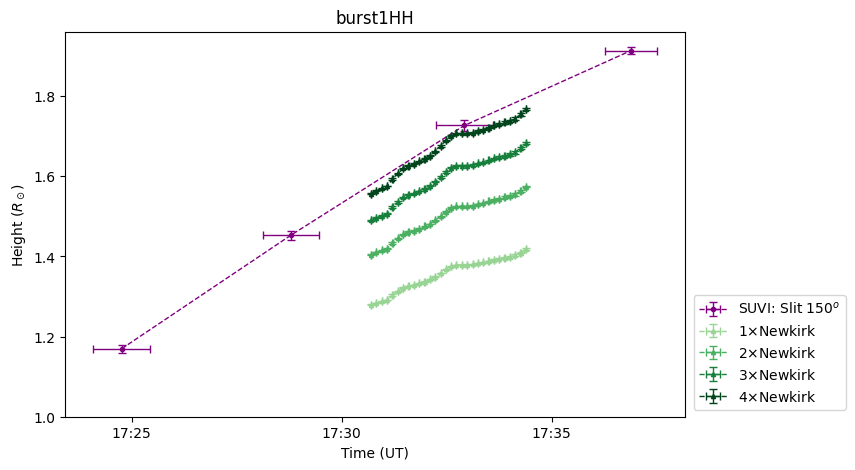

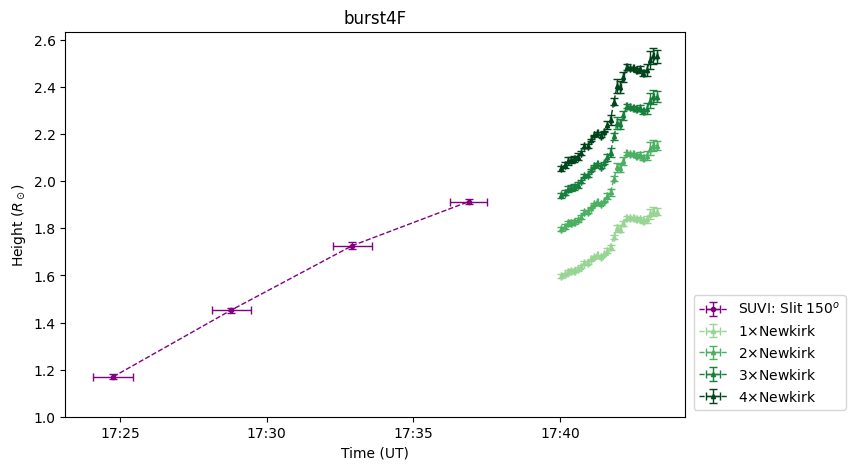

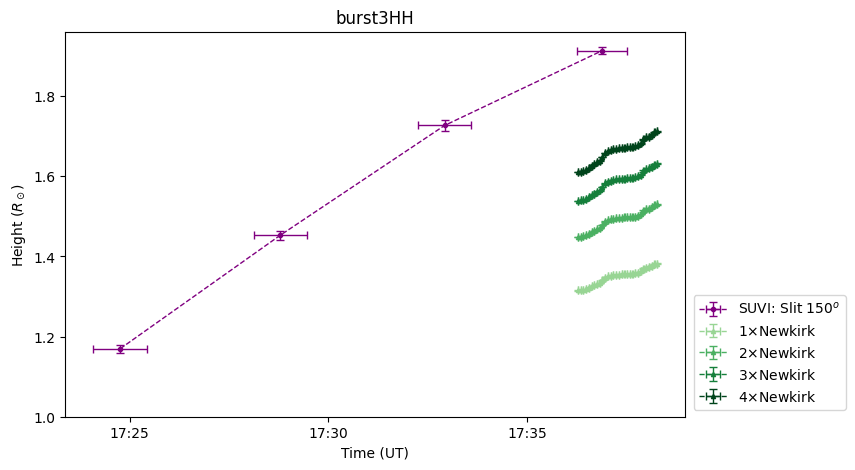

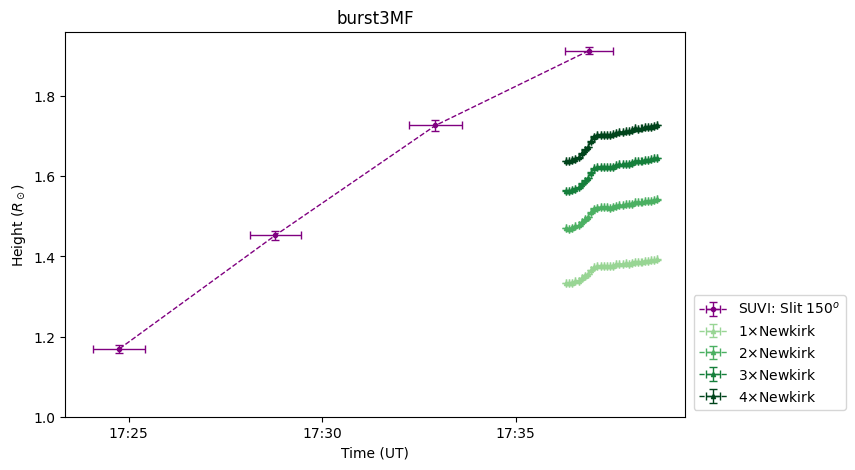

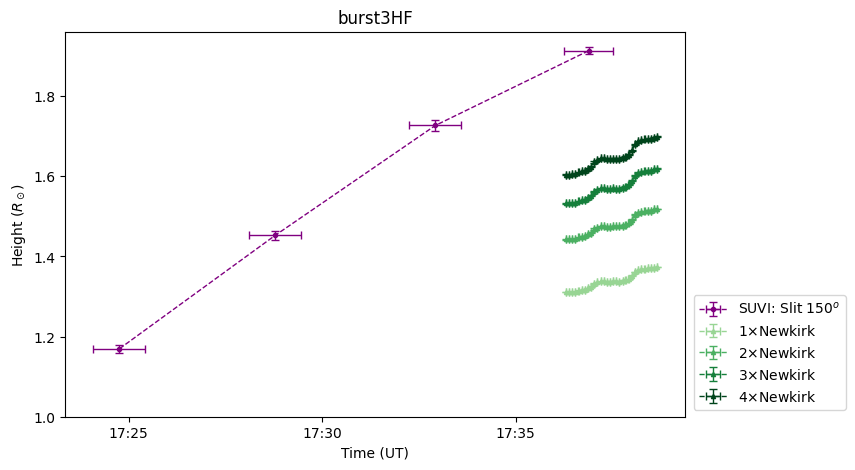

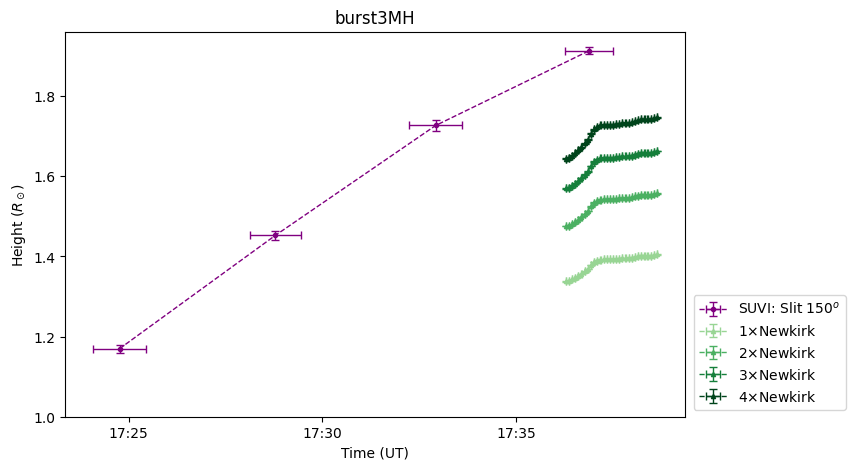

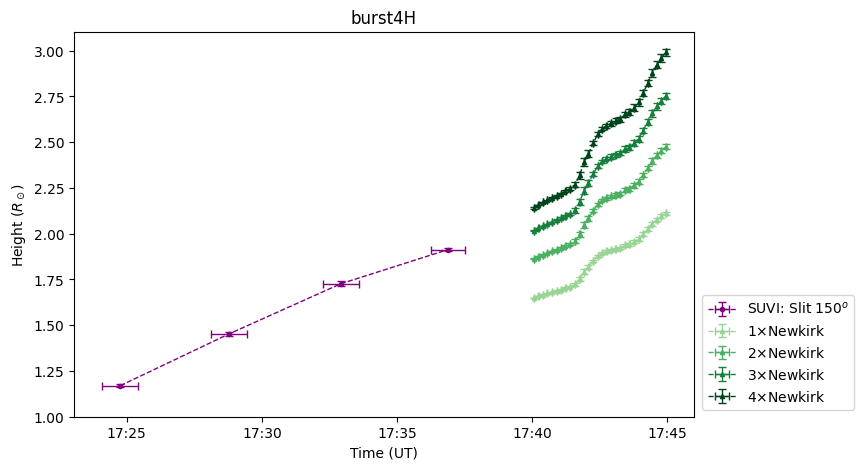

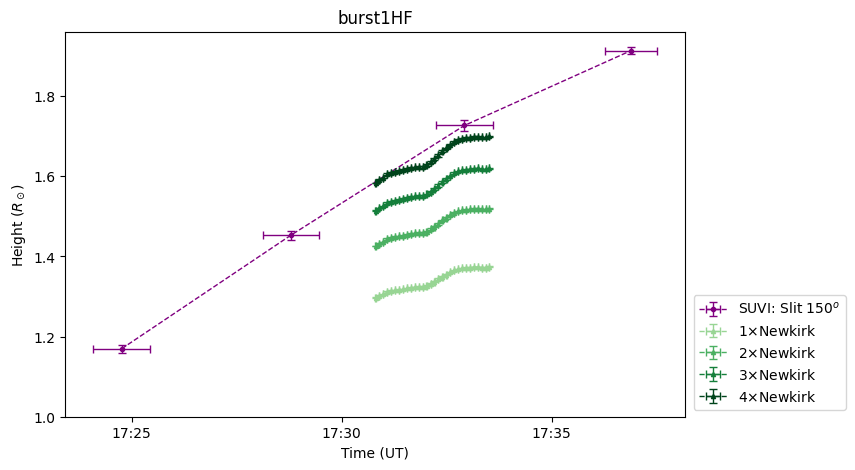

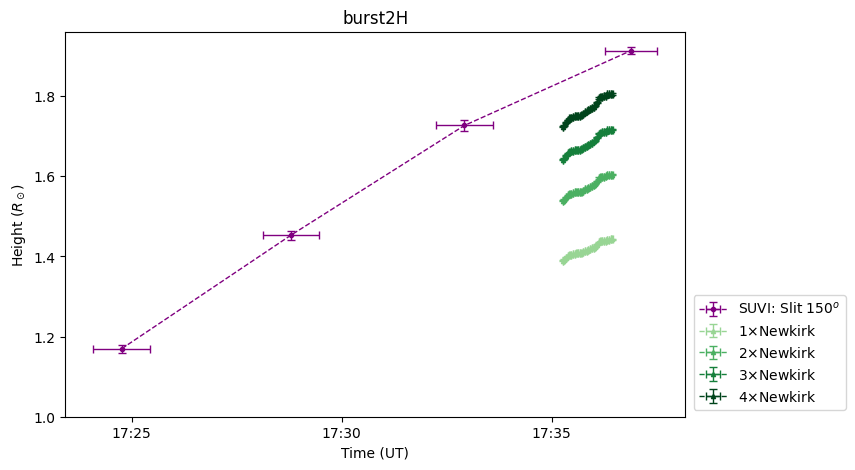

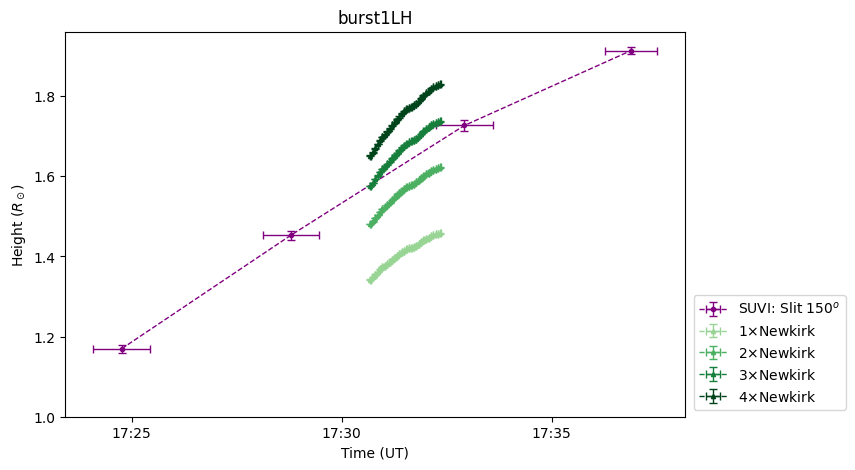

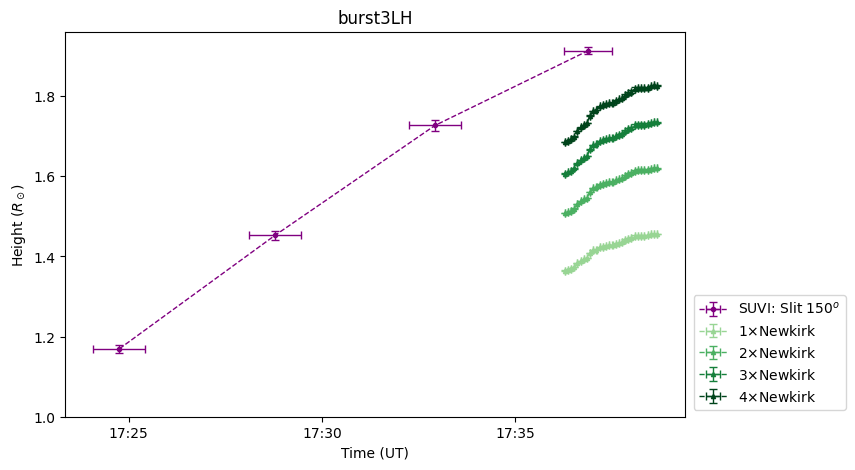

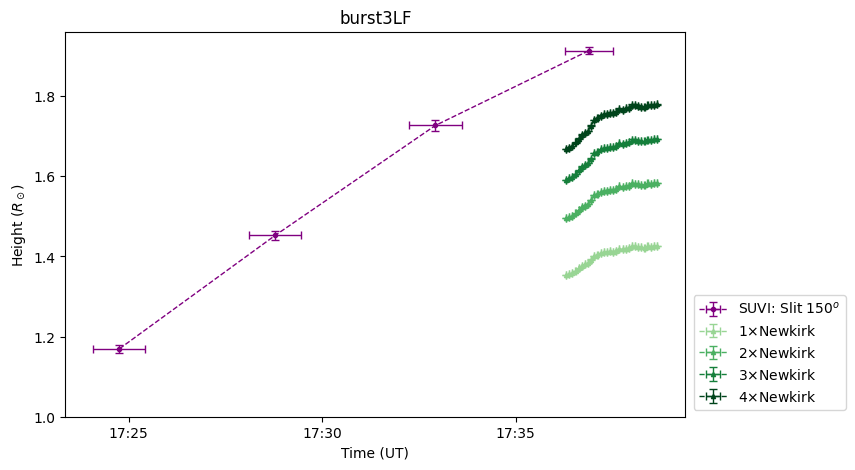

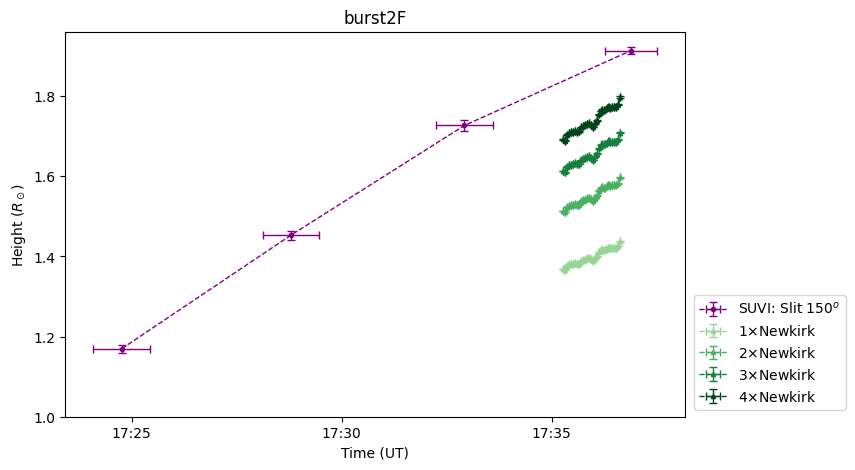

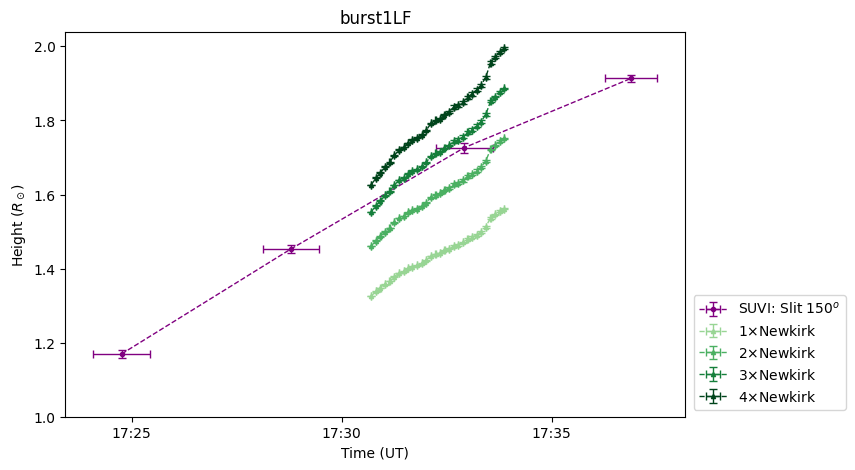

In [115]:
# plot a single slit ...
cmap_radio = plt.get_cmap('Greens')
colors_radio = [cmap_radio(i / 5) for i in range(1, 6)]

# RADIO CURVES ...
for file in radio_filenames:
    df_radio = pd.read_csv(file)
    x = df_radio['t_means']
    
    fig = plt.figure(figsize=[8,5])
    ax = fig.add_subplot(111)
    
    # SUVI CURVE ...
    suvifile = [path for path in suvi_filenames if '150' in path][0]
    df_suvi = pd.read_csv(suvifile)
    ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                markersize=3, linewidth=1,
                fmt='o--', capsize=3, capthick=1, barsabove=True, color='purple',
                ecolor='purple', label=f"SUVI: Slit {suvifile.split('slit')[-1][1:4]}$^o$")
    
    # RADIO CURVES ...
    for i in range(1, 5):
        y = df_radio[f'h{i}_means']
        ax.errorbar(x, y, xerr=df_radio['t_standard_errors'], yerr=df_radio[f'h{i}_standard_errors'],
                    markersize=3, linewidth=1,
                    fmt='^--', capsize=3, capthick=1, barsabove=True, color=colors_radio[i],
                    ecolor=colors_radio[i], label=f'{i}$\\times$Newkirk')
    
    ax.set_title(f"{file.split('/')[-1].split('_')[0]}")
    ax.legend(loc='lower right', bbox_to_anchor=(1.27,0))
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    # ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
    # ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.set_ylim(bottom=1)
    ax.set_xlabel('Time (UT)')
    ax.set_ylabel(r'Height ($R_\odot$)')
    plt.show()

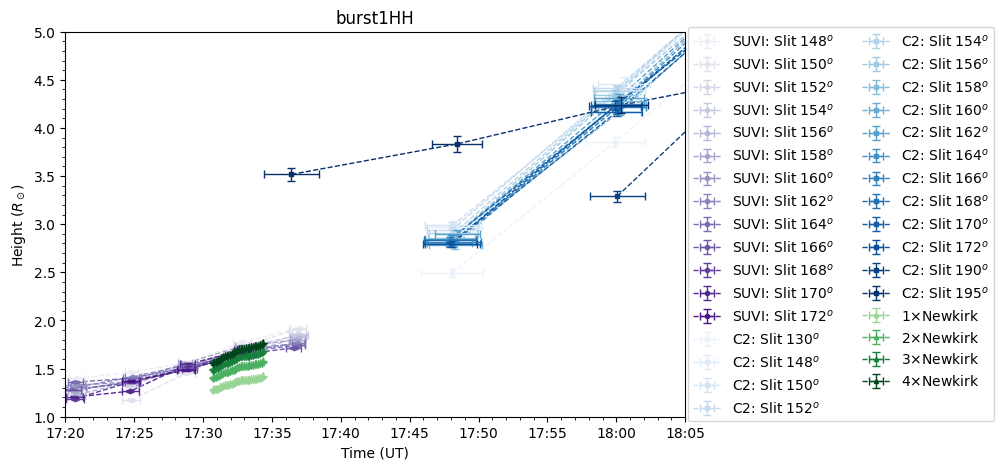

In [91]:
cmap_radio = plt.get_cmap('Greens')
colors_radio = [cmap_radio(i / 5) for i in range(1, 6)]

cmap_suvi = plt.get_cmap('Purples')
color_offset = 2
colors_suvi = [cmap_suvi((i+color_offset) / (len(suvi_filenames)+color_offset)) for i in range(len(suvi_filenames))]

cmap_c2 = plt.get_cmap('Blues')
colors_c2 = [cmap_c2(i / len(c2_click_filenames)) for i in range(1, len(c2_click_filenames)+1)]


# RADIO CURVES ...
for file in radio_filenames[:1]:
    df_radio = pd.read_csv(file)
    x = df_radio['t_means']
    
    fig = plt.figure(figsize=[8,5])
    ax = fig.add_subplot(111)

    # SUVI CURVES ...
    for i, suvifile in enumerate(suvi_filenames):
        df_suvi = pd.read_csv(suvifile)
        ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                    xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                    markersize=3, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_suvi[i],
                    ecolor=colors_suvi[i], label=f"SUVI: Slit {suvifile.split('slit')[-1][1:4]}$^o$")
    
    # LASCO C2 CURVES ...
    for i, c2file in enumerate(c2_click_filenames):
        df_c2 = pd.read_csv(c2file)
        ax.errorbar(df_c2['x_mean'], df_c2['y_mean']/rsun_lasco_c2,
                    xerr=df_c2['x_err'], yerr=df_c2['y_err']/rsun_lasco_c2,
                    markersize=3, linewidth=1,
                    fmt='s--', capsize=3, capthick=1, barsabove=True, color=colors_c2[i],
                    ecolor=colors_c2[i], label=f"C2: Slit {c2file.split('slit')[-1][1:4]}$^o$")

    # RADIO CURVES ...
    for i in range(1, 5):
        y = df_radio[f'h{i}_means']
        ax.errorbar(x, y, xerr=df_radio['t_standard_errors'], yerr=df_radio[f'h{i}_standard_errors'],
                    markersize=3, linewidth=1,
                    fmt='^--', capsize=3, capthick=1, barsabove=True, color=colors_radio[i],
                    ecolor=colors_radio[i], label=f'{i}$\\times$Newkirk')

    ax.set_title(f"{file.split('/')[-1].split('_')[0]}")
    ax.set_xlabel('Time (UT)')
    ax.set_ylabel(r'Height ($R_\odot$)')
    ax.legend(loc='lower right', ncol=2, bbox_to_anchor=(1.51,-0.03))
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.set_ylim(bottom=1, top=5)
    ax.set_xlim(left=pd.Timestamp('2024-05-14 17:20'), right=pd.Timestamp('2024-05-14 18:05'))
    # fig.savefig(f"/home/mnedal/repos/dias_work/jplots/all_clicking/suvi_c2_radio/suvi_c2_{file.split('/')[-1].split('_')[0]}.pdf", format='pdf', bbox_inches='tight')
    plt.show()

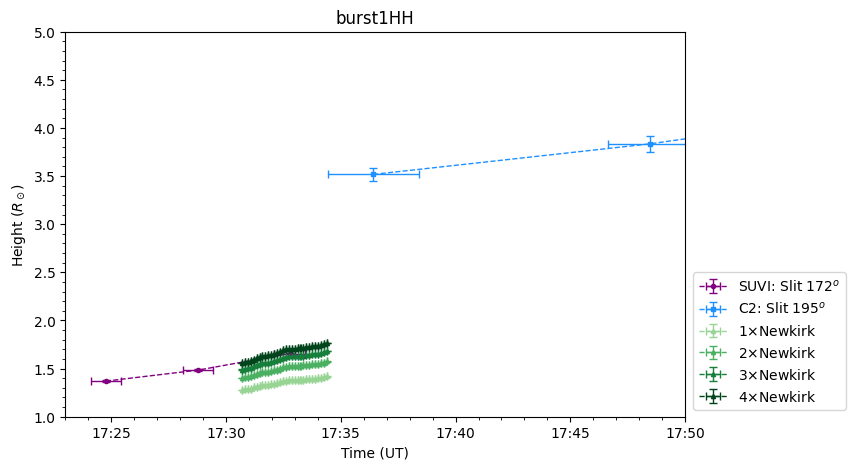

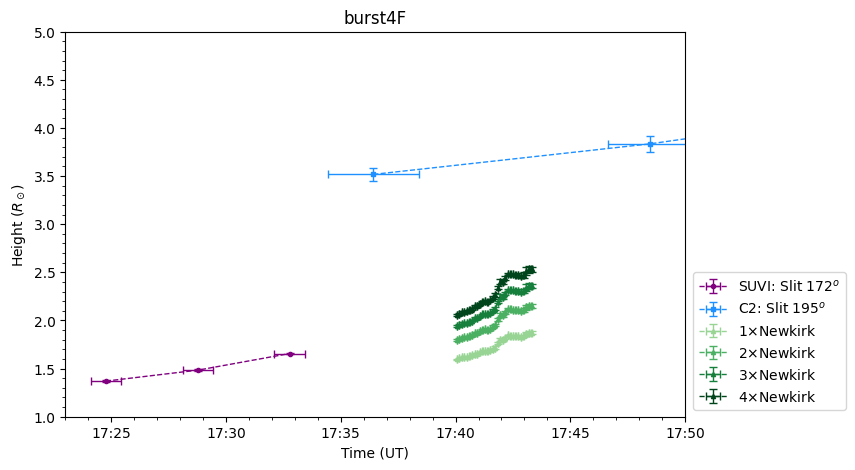

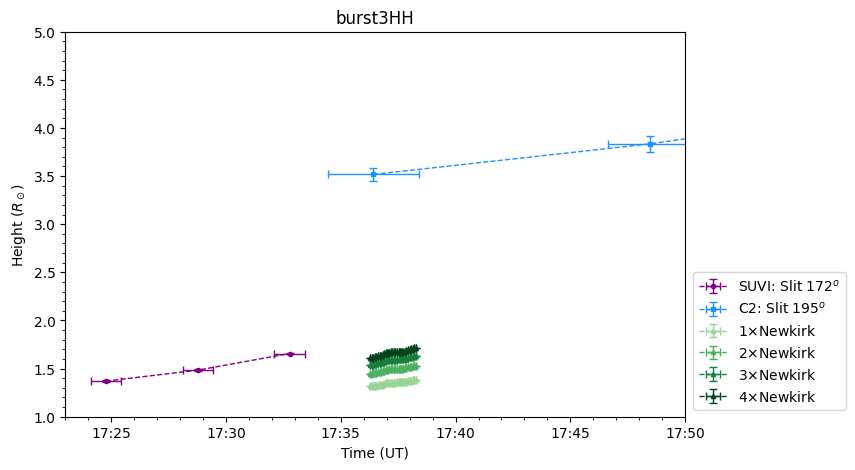

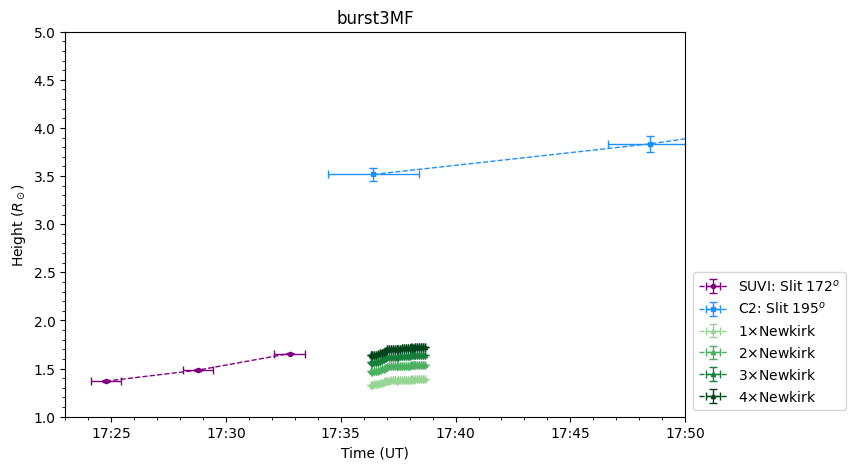

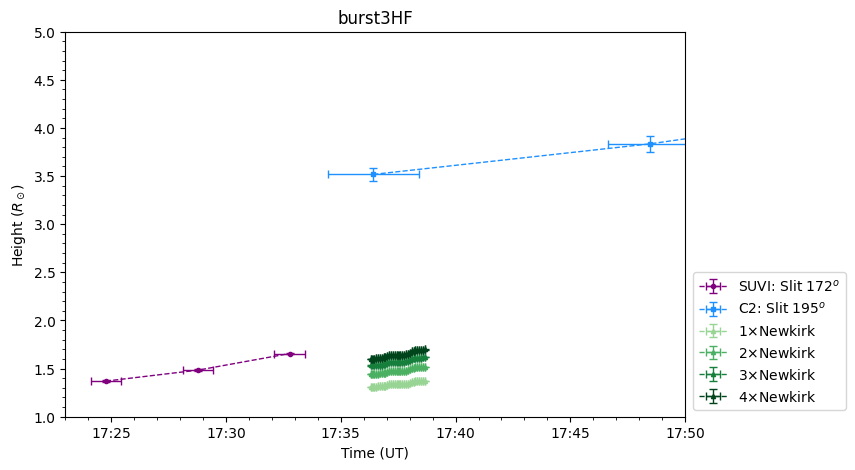

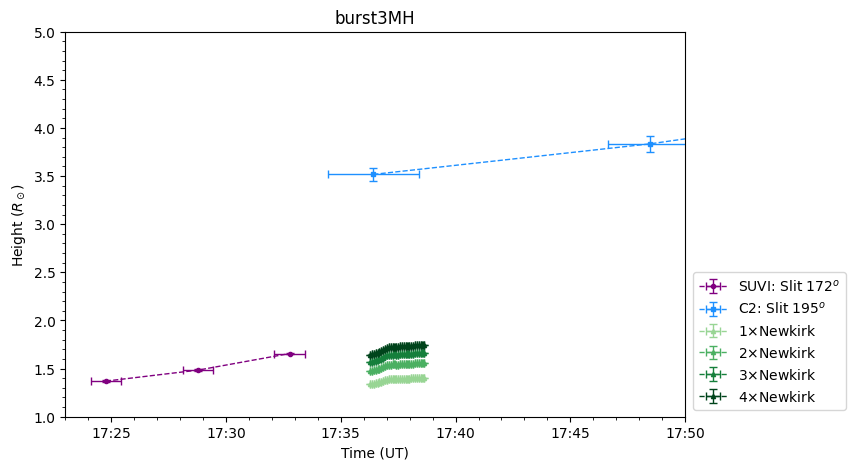

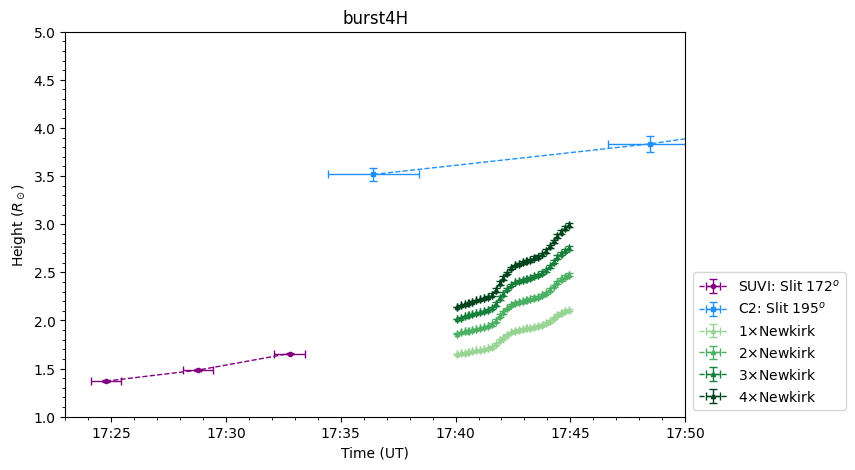

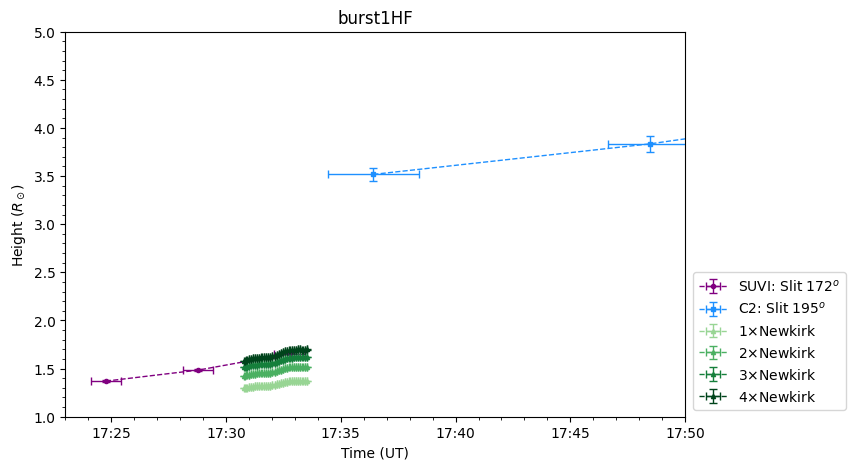

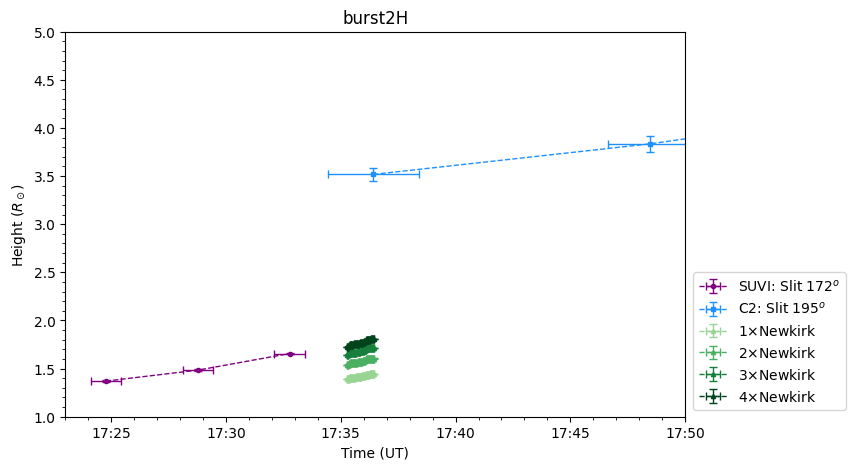

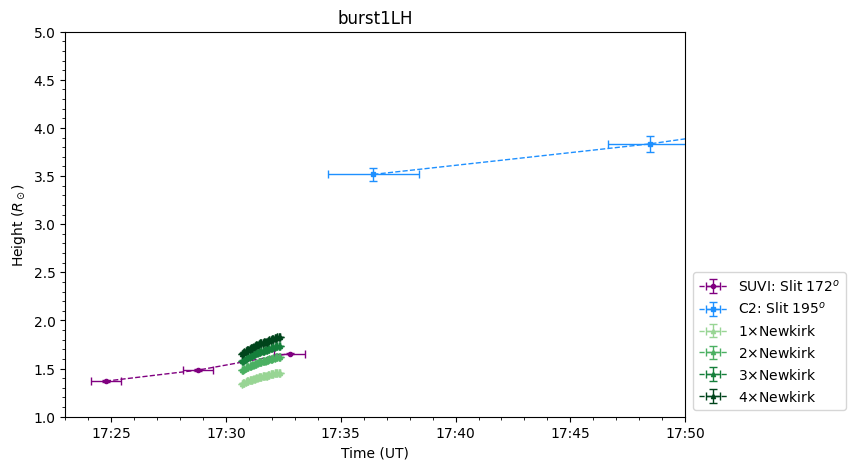

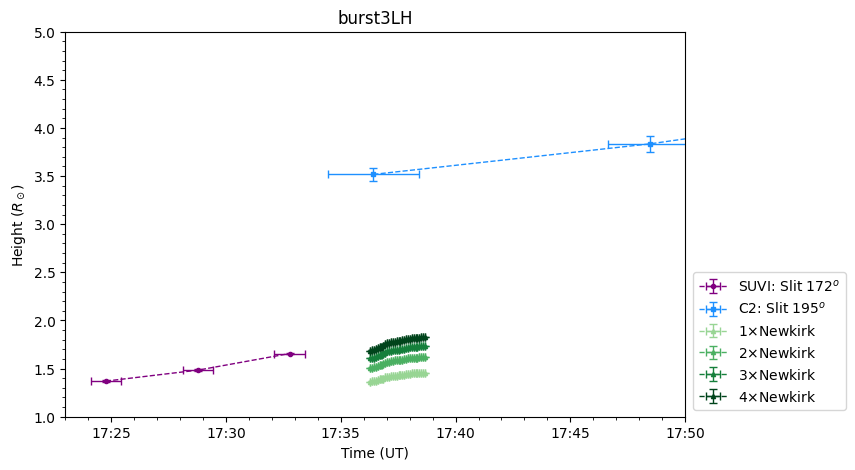

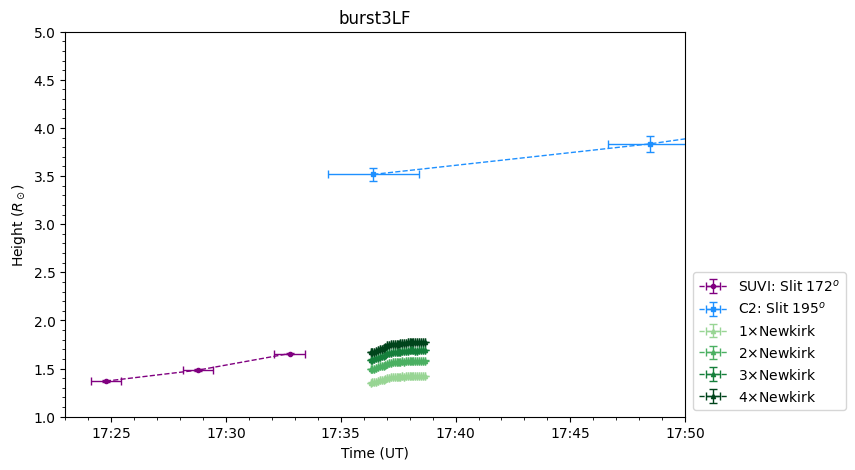

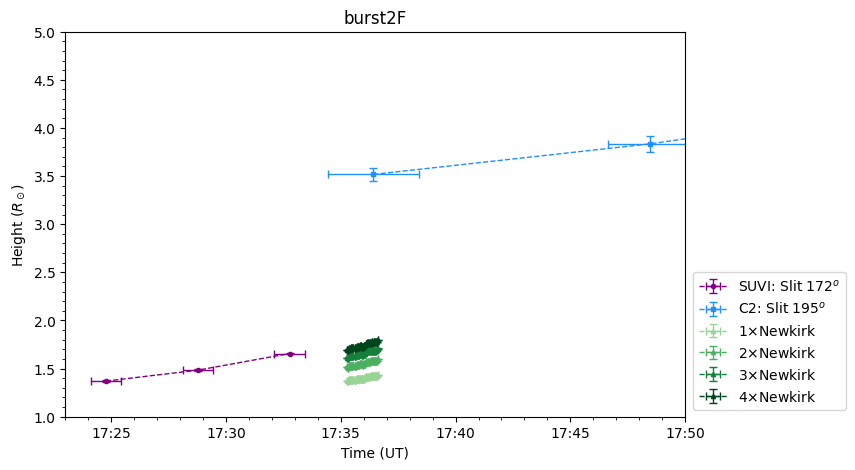

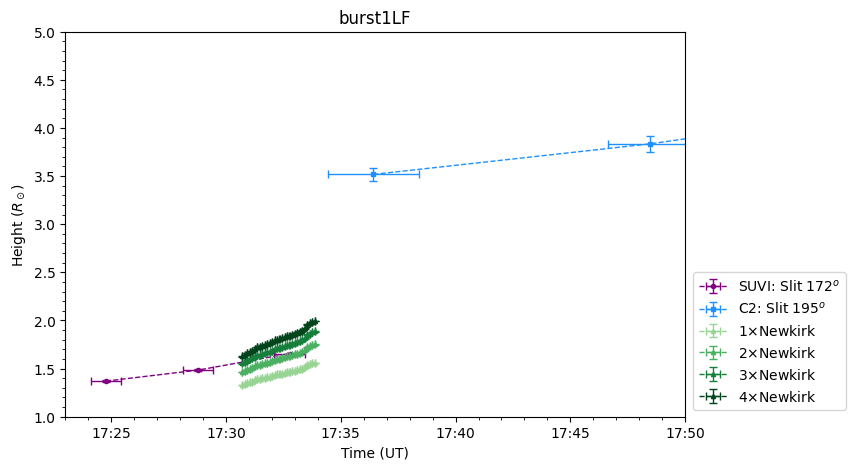

In [149]:
# plot a single slit ...
cmap_radio = plt.get_cmap('Greens')
colors_radio = [cmap_radio(i / 5) for i in range(1, 6)]

# RADIO CURVES ...
for file in radio_filenames:
    df_radio = pd.read_csv(file)
    x = df_radio['t_means']
    
    fig = plt.figure(figsize=[8,5])
    ax = fig.add_subplot(111)
    
    # SUVI CURVE ...
    suvifile = [path for path in suvi_filenames if '172' in path][0]
    df_suvi = pd.read_csv(suvifile)
    ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                markersize=3, linewidth=1,
                fmt='o--', capsize=3, capthick=1, barsabove=True, color='purple',
                ecolor='purple', label=f"SUVI: Slit {suvifile.split('slit')[-1][1:4]}$^o$")
    
    # LASCO C2 CURVE ...
    c2file = [path for path in c2_click_filenames if '195' in path][0]
    df_c2 = pd.read_csv(c2file)
    ax.errorbar(df_c2['x_mean'], df_c2['y_mean']/rsun_lasco_c2,
                        xerr=df_c2['x_err'], yerr=df_c2['y_err']/rsun_lasco_c2,
                        markersize=3, linewidth=1,
                        fmt='s--', capsize=3, capthick=1, barsabove=True, color='dodgerblue',
                        ecolor='dodgerblue', label=f"C2: Slit {c2file.split('slit')[-1][1:4]}$^o$")
    
    # RADIO CURVES ...
    for i in range(1, 5):
        y = df_radio[f'h{i}_means']
        ax.errorbar(x, y, xerr=df_radio['t_standard_errors'], yerr=df_radio[f'h{i}_standard_errors'],
                    markersize=3, linewidth=1,
                    fmt='^--', capsize=3, capthick=1, barsabove=True, color=colors_radio[i],
                    ecolor=colors_radio[i], label=f'{i}$\\times$Newkirk')

    ax.set_title(f"{file.split('/')[-1].split('_')[0]}")
    ax.set_xlabel('Time (UT)')
    ax.set_ylabel(r'Height ($R_\odot$)')
    ax.legend(loc='lower right', bbox_to_anchor=(1.27,0))
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.set_ylim(bottom=1, top=5)
    ax.set_xlim(left=pd.Timestamp('2024-05-14 17:23'), right=pd.Timestamp('2024-05-14 17:50'))
    # fig.savefig(f"/home/mnedal/repos/dias_work/jplots/all_clicking/suvi_c2_radio/suvi_c2_{file.split('/')[-1].split('_')[0]}.pdf", format='pdf', bbox_inches='tight')
    plt.show()